In [1]:
!nvidia-smi

Wed Apr 23 15:44:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install tensorflow==2.18.0

In [16]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [8]:
import os
from matplotlib import pyplot as plt
# import tensorflow as tf
import tensorflow_io as tfio
import numpy as np
import pandas as pd

/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl8str_util8EndsWithESt17basic_string_viewIcSt11char_traitsIcEES4_']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZN3tsl8str_util9LowercaseB5cxx11ESt17basic_s

In [9]:
CAPUCHIN_FILE = os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips', 'XC3776-0.wav')
NOT_CAPUCHIN_FILE = os.path.join( '/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')
print(CAPUCHIN_FILE)
print(NOT_CAPUCHIN_FILE)


/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC3776-0.wav
/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav


In [10]:
import soundfile as sf
import scipy.signal
import numpy as np

def load_wav_16k_mono1(filename):
    wav, sample_rate = sf.read(filename)

    # If stereo, convert to mono
    if len(wav.shape) > 1:
        wav = np.mean(wav, axis=1)

    # Resample if needed
    if sample_rate != 16000:
        number_of_samples = round(len(wav) * float(16000) / sample_rate)
        wav = scipy.signal.resample(wav, number_of_samples)

    return wav.astype(np.float32)


In [11]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

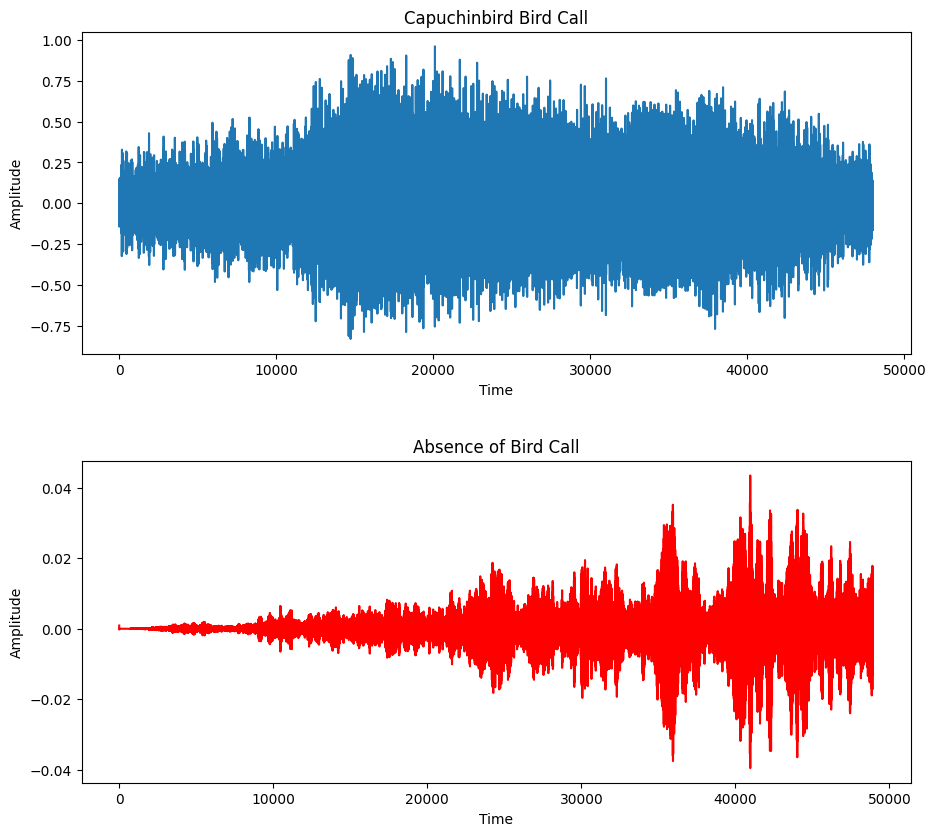

In [12]:
fig = plt.figure(figsize=(10,9))
plt.subplot(2,1,1)
plt.plot(wave)
plt.title('Capuchinbird Bird Call')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(2,1,2)
plt.plot(nwave,c='r')
plt.title('Absence of Bird Call')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout(pad=3.0)
plt.show()

# **Dataset** **Creation**

In [13]:
POS = os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips')
NEG = os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips')

In [17]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

I0000 00:00:1745427132.118145    2157 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1745427132.118782    2157 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [18]:
pos.as_numpy_iterator().next()

b'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC216012-12.wav'

In [19]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [20]:
data.as_numpy_iterator().next()

(b'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC114131-3.wav',
 1.0)

#**SOUND PROCESSING**

In [ ]:
lengths = []
for file in os.listdir(os.path.join('./', 'Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('./', 'Parsed_Capuchinbird_Clips', file))
    lengths.append(len(tensor_wave))

In [ ]:
tf.math.reduce_mean(lengths).numpy()

In [ ]:
print('Avg time of each recording')
54156/16000

In [ ]:
tf.math.reduce_min(lengths).numpy()

In [ ]:
tf.math.reduce_max(lengths).numpy()

larger the spectogram size more varibles will be required, more time to train. So taking average of 48000 cycles as the size of spectogram.





In [21]:
def preprocess(file_path, label):
    def _load_wav(file_path_tensor):
        # Convert the tensor to a string
        file_path = file_path_tensor.numpy().decode('utf-8')
        wav = load_wav_16k_mono(file_path)
        # Ensure the wav is exactly 48000 samples
        if len(wav) < 48000:
            # Pad with zeros at the beginning
            wav = np.concatenate([np.zeros(48000 - len(wav)), wav])
        else:
            # Truncate to 48000 samples
            wav = wav[:48000]
        return wav.astype(np.float32)
    
    # Use tf.py_function to execute the Python function
    wav = tf.py_function(_load_wav, [file_path], tf.float32)
    # Set the shape of the waveform tensor
    wav.set_shape([48000])
    
    # Generate spectrogram
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    spectrogram.set_shape([1491, 257, 1])
    
    return spectrogram, label

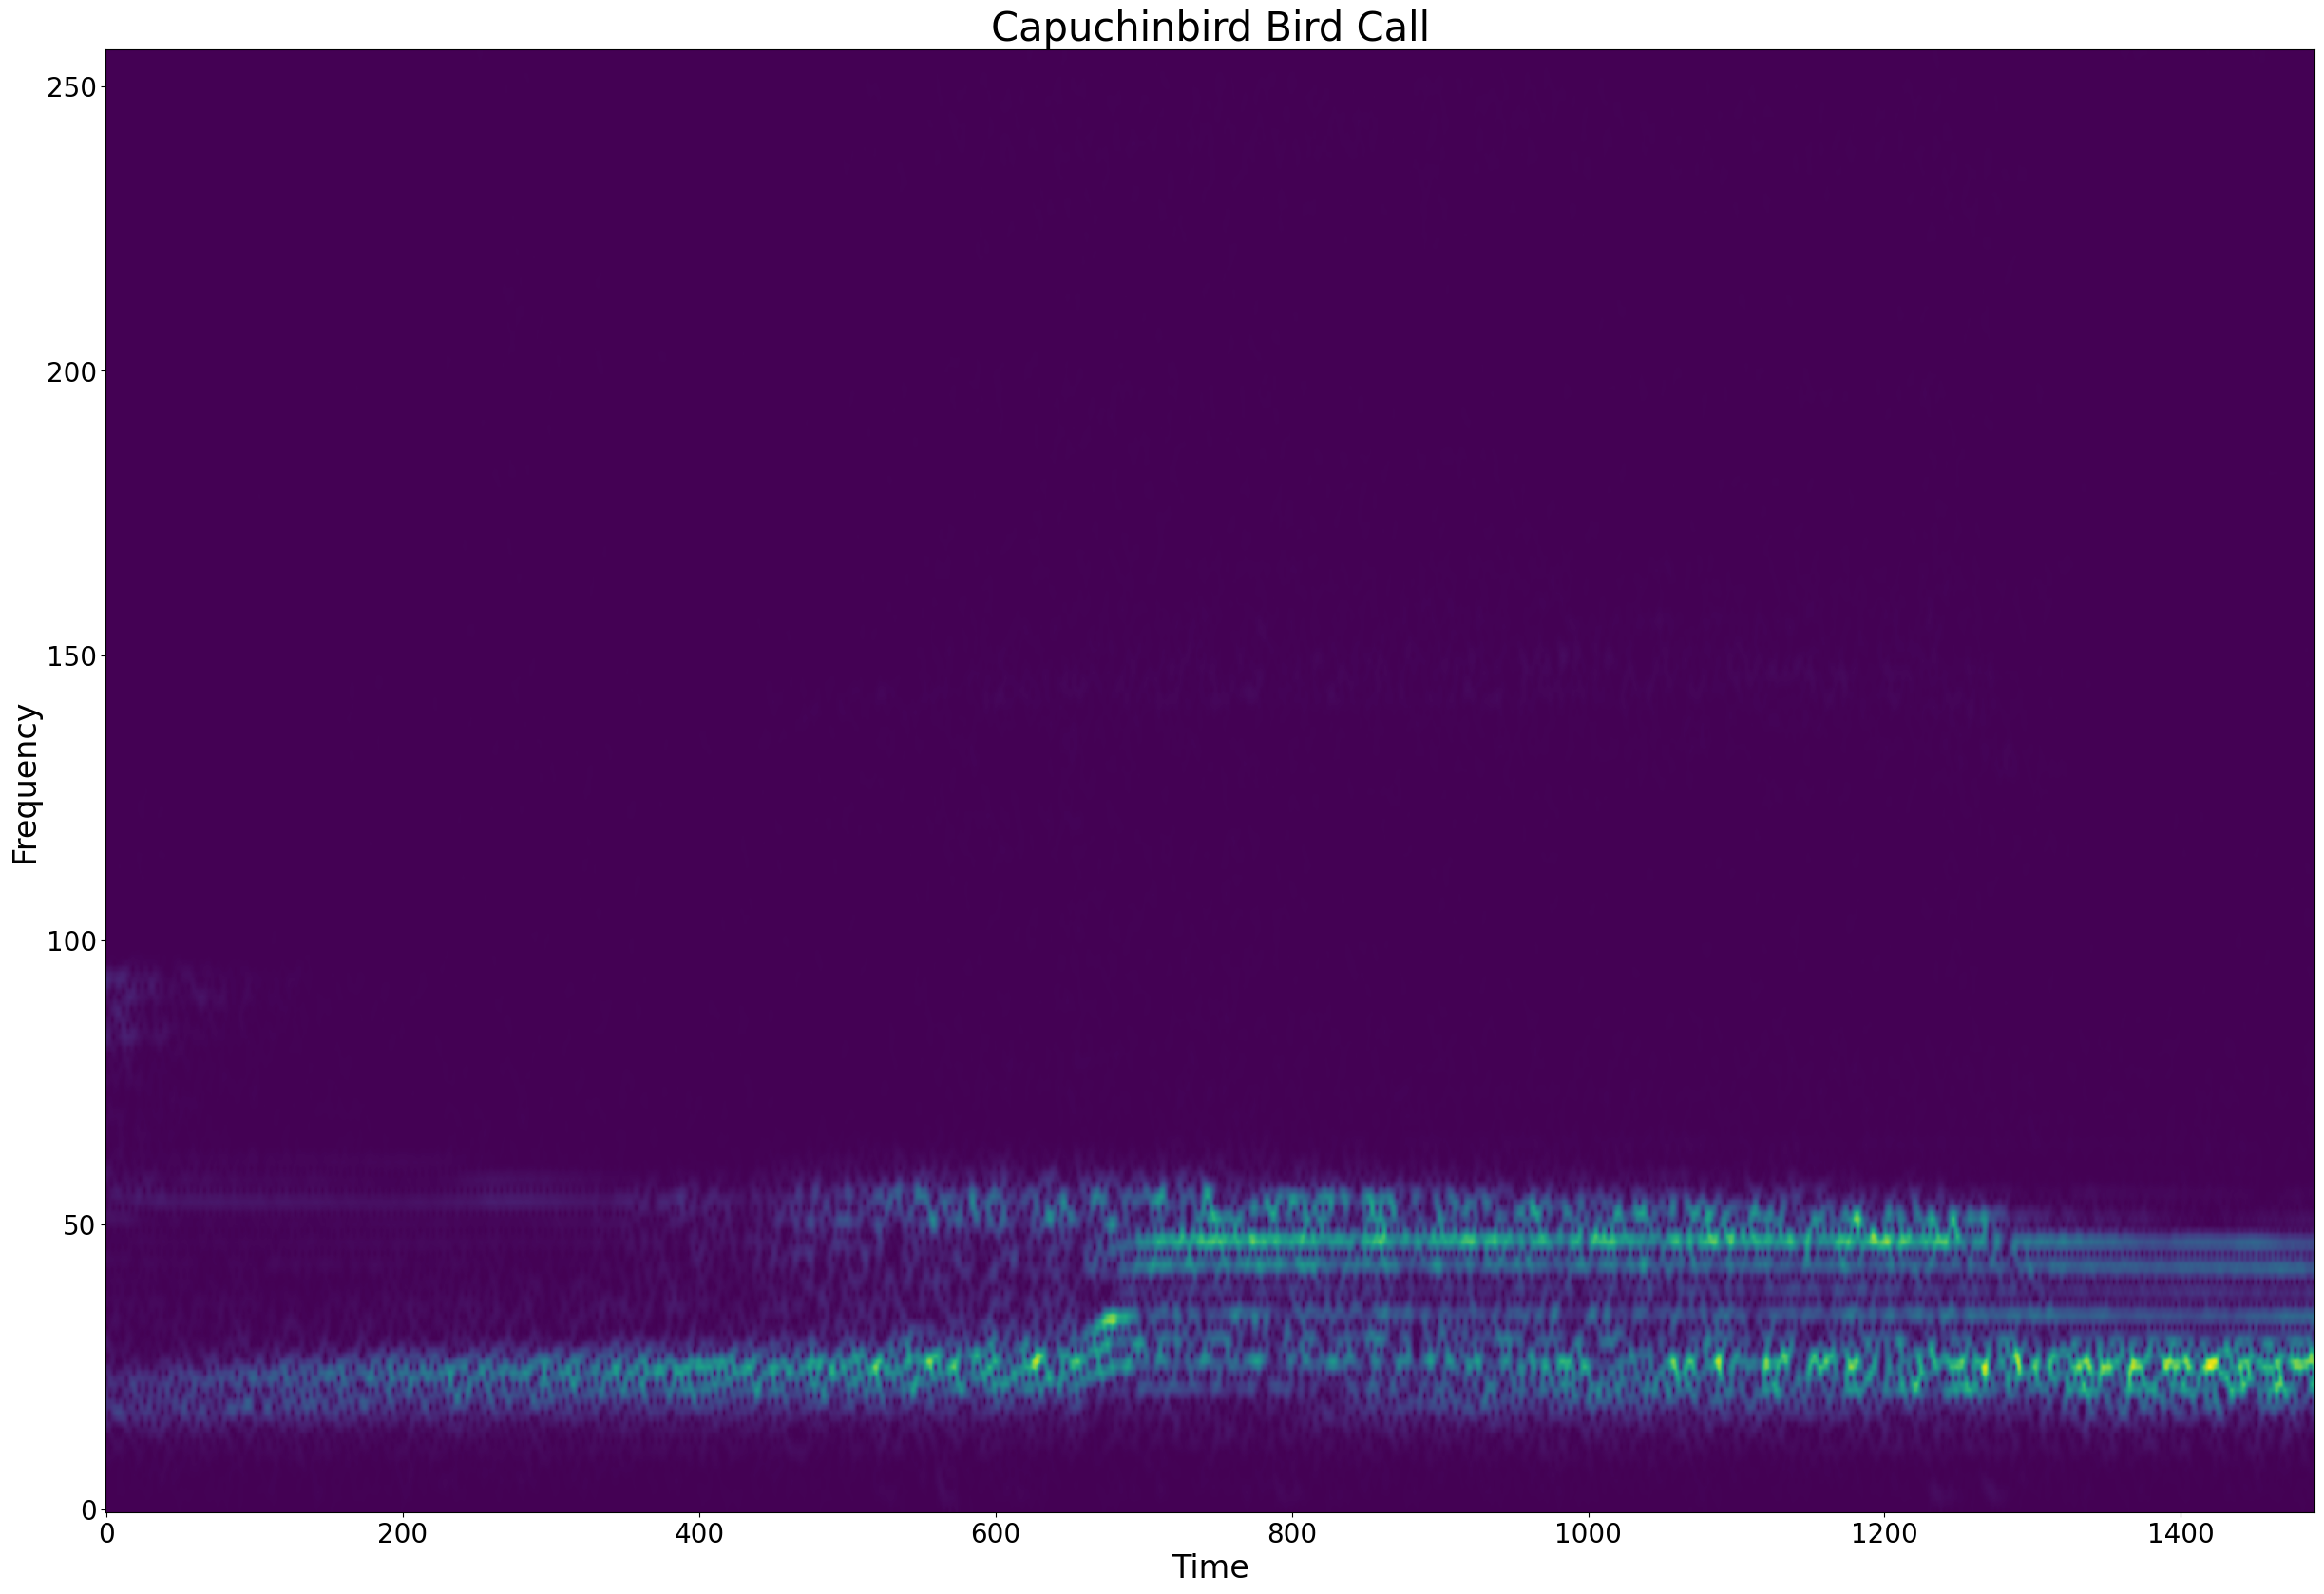

In [37]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)
plt.figure(figsize=(30, 20))
plt.title('Capuchinbird Bird Call', fontsize=30)
plt.imshow(tf.transpose(spectrogram)[0], aspect='auto', origin='lower')
plt.xlabel('Time', fontsize=24)
plt.ylabel('Frequency', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


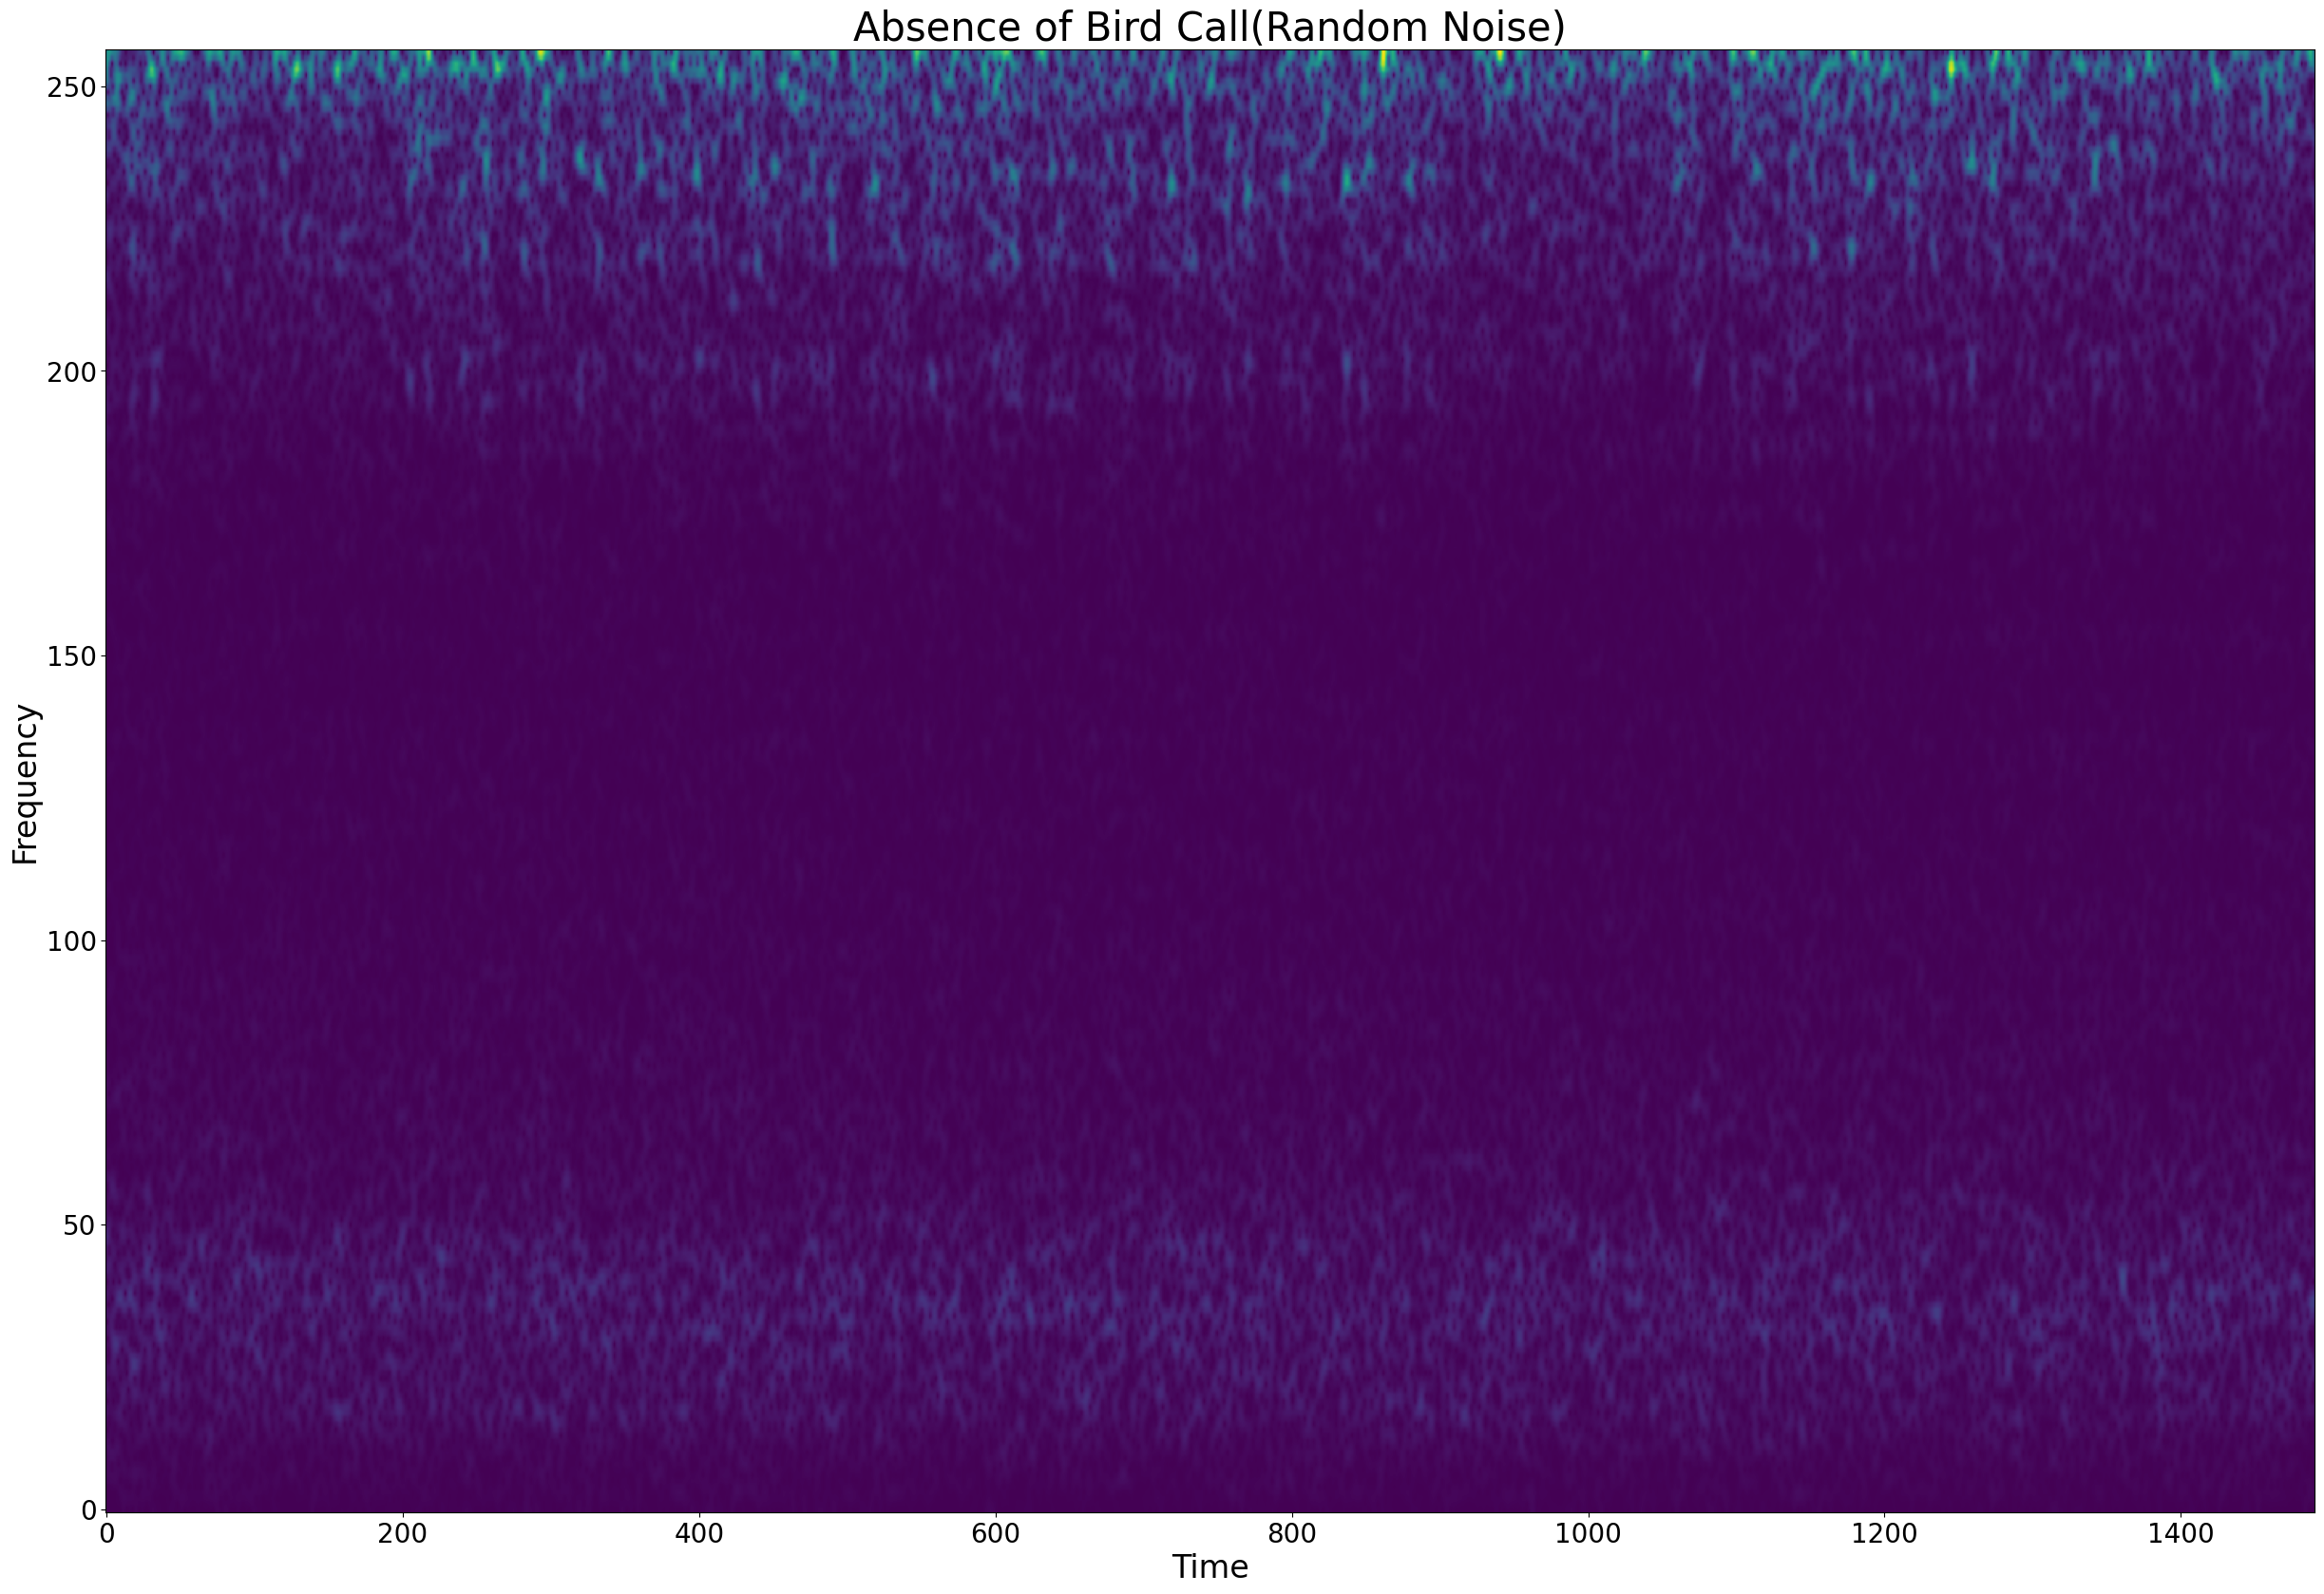

In [48]:
filepath, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)
plt.figure(figsize=(30, 20))
plt.title('Absence of Bird Call(Random Noise)', fontsize=30)
plt.imshow(tf.transpose(spectrogram)[0], aspect='auto', origin='lower')
plt.xlabel('Time', fontsize=24)
plt.ylabel('Frequency', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


# **Model**

In [22]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(8)
data = data.prefetch(8)

In [23]:
len(data)

102

In [24]:
train = data.take(71)
test = data.skip(71).take(31)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten,MaxPooling2D,Input,BatchNormalization,Dropout

In [165]:
model = Sequential()
model.add(Input(shape=(1491, 257, 1)))
model.add(BatchNormalization())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [166]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision(),'accuracy'])

In [167]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 1491, 257, 1)        │               4 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 1489, 255, 16)       │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1489, 255, 16)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 744, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 744, 127, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 742, 125, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 742, 125, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 371, 62, 16)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 368032)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      47,108,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,110,901 (179.71 MB)

 Trainable params: 47,110,867 (179.71 MB)

 Non-trainable params: 34 (136.00 B)

In [168]:
hist = model.fit(train, epochs=20, validation_data=test)

Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.7935 - loss: 47.1726 - precision_1: 0.5871 - recall_1: 0.6099 - val_accuracy: 0.8967 - val_loss: 1.0772 - val_precision_1: 0.7073 - val_recall_1: 0.9831
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.9432 - loss: 3.3856 - precision_1: 0.8819 - recall_1: 0.9277 - val_accuracy: 0.9298 - val_loss: 0.1146 - val_precision_1: 0.7714 - val_recall_1: 0.9818
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9433 - loss: 0.6709 - precision_1: 0.8867 - recall_1: 0.8823 - val_accuracy: 0.9793 - val_loss: 0.1472 - val_precision_1: 0.9412 - val_recall_1: 0.9846
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9742 - loss: 0.4260 - precision_1: 0.9185 - recall_1: 0.9652 - val_accuracy: 0.9091 - val_loss: 0.1231 - val_precision_1: 0.7802 - val_recall_1: 0.9726
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.9801 - loss: 0.7398 - precision_1: 0.9780 - recall_1: 0.9382 - va

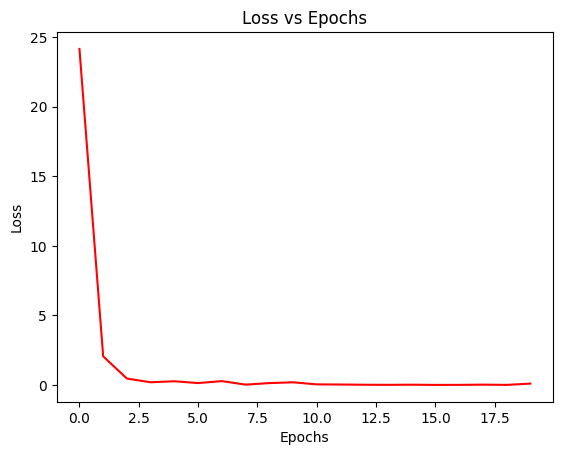

In [170]:
plt.title('Loss vs Epochs')
plt.plot(hist.history['loss'], 'r')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [171]:
X_test, y_test = test.as_numpy_iterator().next()
yhat = model.predict(X_test)
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


In [172]:
yhat

[0, 1, 0, 1, 0, 0, 0, 0]

In [173]:
list(y_test.astype(np.int64))

[0, 1, 0, 1, 0, 0, 0, 0]

In [174]:
results = model.evaluate(train)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9465 - loss: 0.0633 - precision_1: 0.8416 - recall_1: 1.0000


In [175]:
print(f"Training Recall   : {results[1]*100}%")
print(f"Training Precision: {results[2]*100}%")
print(f"Training Accuracy : {results[3]*100}%")

Training Recall   : 100.0%
Training Precision: 80.51282167434692%
Training Accuracy : 93.30986142158508%


In [176]:
test_results = model.evaluate(test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9183 - loss: 0.0923 - precision_1: 0.7859 - recall_1: 1.0000


In [177]:
print(f"Test Recall       : {test_results[1]*100}%")
print(f"Test Precision    : {test_results[2]*100}%")
print(f"Test Accuracy     : {test_results[3]*100}%")

Test Recall       : 100.0%
Test Precision    : 77.63158082962036%
Test Accuracy     : 92.97520518302917%


In [31]:
tf.keras.backend.clear_session()

In [32]:
# AlexNet-Inspired Model
alex = Sequential([
    Input(shape=(1491, 257, 1)),
    Conv2D(96, (11, 11), strides=(4, 4), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(256, (5, 5), strides=(1, 1), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same'),
    Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same'),
    Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [33]:
alex.compile(optimizer='adam', loss='binary_crossentropy',  metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision(),'accuracy'])
alex.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 373, 65, 96)         │          11,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 186, 32, 96)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 186, 32, 256)        │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 92, 15, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 92, 15, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 92, 15, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 92, 15, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 45, 7, 256)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 80640)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     330,305,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 350,814,913 (1.31 GB)

 Trainable params: 350,814,913 (1.31 GB)

 Non-trainable params: 0 (0.00 B)

In [34]:
hist = alex.fit(train, epochs=5, validation_data=test)

Epoch 1/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 183ms/step - accuracy: 0.7879 - loss: 1.9287 - precision: 0.6659 - recall: 0.6409 - val_accuracy: 0.9463 - val_loss: 0.1223 - val_precision: 1.0000 - val_recall: 0.7593
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 162ms/step - accuracy: 0.9136 - loss: 0.7642 - precision: 0.8794 - recall: 0.8226 - val_accuracy: 0.9793 - val_loss: 0.0627 - val_precision: 0.9683 - val_recall: 0.9531
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - accuracy: 0.9330 - loss: 0.2465 - precision: 0.8968 - recall: 0.8622 - val_accuracy: 0.9298 - val_loss: 0.1685 - val_precision: 0.9074 - val_recall: 0.8033
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - accuracy: 0.9249 - loss: 0.2110 - precision: 0.8904 - recall: 0.8471 - val_accuracy: 0.9628 - val_loss: 0.0750 - val_precision: 0.9032 - val_recall: 0.9492
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 166ms/step - accuracy: 0.9145 - loss: 0.3445 - precision: 0.8474 - recall: 0.8602 - val_accuracy: 0.9752 - val_loss: 0.

In [35]:
results = alex.evaluate(train)
print(f"Training Recall   : {results[1]*100}%")
print(f"Training Precision: {results[2]*100}%")
print(f"Training Accuracy : {results[3]*100}%")
test_results = alex.evaluate(test)
print(f"Test Recall       : {test_results[1]*100}%")
print(f"Test Precision    : {test_results[2]*100}%")
print(f"Test Accuracy     : {test_results[3]*100}%")

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9634 - loss: 0.0814 - precision: 0.9204 - recall: 0.9421
Training Recall   : 95.30201554298401%
Training Precision: 93.42105388641357%
Training Accuracy : 97.00704216957092%
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9721 - loss: 0.0898 - precision: 0.9424 - recall: 0.9688
Test Recall       : 97.22222089767456%
Test Precision    : 93.33333373069763%
Test Accuracy     : 97.10744023323059%


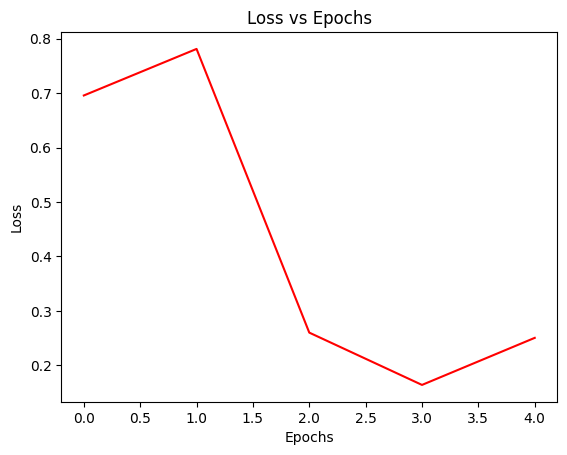

In [36]:
plt.title('Loss vs Epochs')
plt.plot(hist.history['loss'], 'r')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()